## Simulation and code.

Top left: Time domain plot. Displacement against time.<br>
Top right: Phase plane plot. Velocity against displacement.<br>
Bottom left: Frequency domain plot. Amplitude against frequency.

<IPython.core.display.Javascript object>


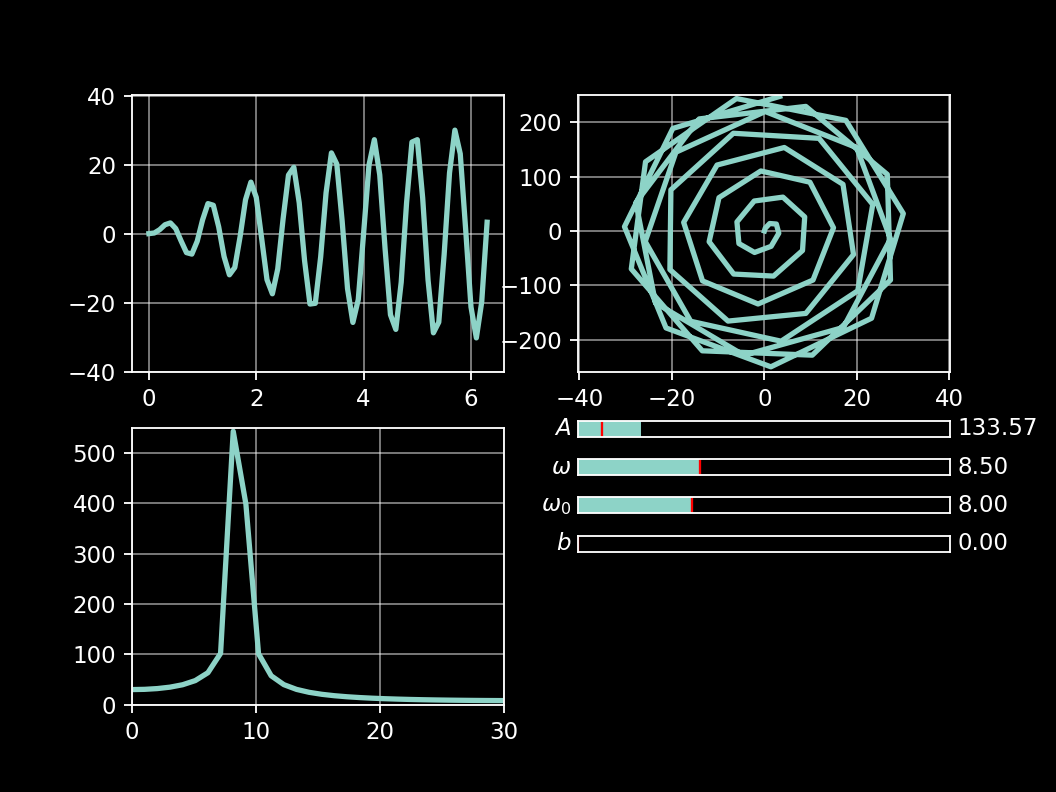

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec as gs

h = .1
ncycles = 1
f_max = 50
T = ncycles*2*np.pi

w0 = 5
w = 5.5
A = 50
b = 0


def f(y_, t):
    x = y_[0]
    y = y_[1]
    xdot = y
    ydot = -(w0**2)*x + A*np.sin(w*t)-b*y
    return np.concatenate([xdot,ydot],0)

def eul(y,t,h,f):
    return y + h*f(y,t)

def rk4(y,t,h,f):
    k_1 = h*f(y, t)
    k_2 = h*f(y+k_1/2, t+h/2)
    k_3 = h*f(y+k_2/2, t+h/2)
    k_4 = h*f(y+k_3, t+h)
    return y + (k_1+2*k_2+2*k_3+k_4)/6

t = np.arange(0, T+h, h)
N = t.shape[0]
x = np.matrix(np.zeros([2,N]))

x[0,0] = 0

for i in range(0, N-1):
    x[:,i+1] = rk4(x[:,i],t[i],h,f)

plt.style.use('dark_background')

G = gs(2,2)
G1 = gs(32,2)
fig = plt.figure(5)

ax_xt = fig.add_subplot(G[0,0])
ax_phase = fig.add_subplot(G[0,1])
ax_fft = fig.add_subplot(G[1,0])
ax_A = fig.add_subplot(G1[17,1])
ax_w = fig.add_subplot(G1[19,1])
ax_w0 = fig.add_subplot(G1[21,1])
ax_b = fig.add_subplot(G1[23,1])

ax_xt.grid(alpha=0.5)
ax_phase.grid(alpha=0.5)
ax_fft.grid(alpha=0.5)


line_xt, = ax_xt.plot(t,x[0,:].T,'-',linewidth=2.3)
line_phase, = ax_phase.plot(x[0,:].T,x[1,:].T,linewidth=2.3)
line_fft, = ax_fft.plot(np.linspace(0,200,f_max*ncycles),np.abs(np.fft.fft(x[0,:])).T[:f_max*ncycles],linewidth=2.3)

slider_A = Slider(ax_A, '$A$', 0, 800, 50)
slider_w = Slider(ax_w, '$\omega$', 0.5, 25, 8.5)
slider_w0 = Slider(ax_w0, '$\omega_0$', 0.5, 25, 8)
slider_b = Slider(ax_b, '$b$', 0, 10, 0)

lims = lambda x: [-0.2+10*np.floor(.1*np.min(x)),0.2+10*np.ceil(.1*np.max(x))]

def update(i):
    global A,w,w0,b
    
    A = slider_A.val
    w = slider_w.val
    w0 = slider_w0.val
    b = slider_b.val
    
    t = np.arange(0, T+h, h)
    N = t.shape[0]
    x = np.matrix(np.zeros([2,N]))

    x[0,0] = 0

    for i in range(0, N-1):
        x[:,i+1] = rk4(x[:,i],t[i],h,f)
    
    line_xt.set_data(t,x[0,:].T)
    line_phase.set_data(x[0,:].T,x[1,:].T)
    fft_ = np.abs(np.fft.fft(x[0,:])).T[:f_max*ncycles]
    line_fft.set_data(np.linspace(0,50,f_max*ncycles),fft_)
    
    ax_xt.set(ylim=lims(x[0,:]))
    ax_phase.set(xlim=lims(x[0,:]),ylim=lims(x[1,:]))
    ax_fft.set(xlim=(0,30))
    ax_fft.set(ylim=lims(fft_))
    
slider_A.on_changed(update)
slider_w.on_changed(update)
slider_w0.on_changed(update)
slider_b.on_changed(update)

update(1)

## Exercises.
### Using the simulation.
1. Start with $b=0$ (no damping), $A= 250$, $\omega_0 = 10$. Qualitatively, describe the motion in the following cases. Use the time and frequency domain plots to help you.<br>
&emsp; $\omega << \omega_0$<br>
&emsp; $\omega >> \omega_0$ <br>
&emsp; $\omega \approx \omega_0$<br>
1. Now set $\omega << \omega_0 = 10$ and increase $b$. What happens? What does the circle in the phase plane represent?
1. Now, set $\omega= \omega_0=10$. Play around with different values of $A$ and $b$.<br>
&emsp; What does a outward spiral in the phase plane indicate? How do we know the trajectory goes outwards, not inwards? 
1. Is the fact that the graphs don't look perfectly smooth due to the characteristics of the physical system? If not, how could you make the graphs closer to reality, and why was this not chosen here?
1. What values of $A, \omega, \omega_0, b$ cause 'beats'? What values should be chosen so the amplitude increases to a maximum (in finite time) and stays there? 


### Solving differential equations.
1. Sketch the solution to $y' = y, y(0) = 1$, without doing any calculation. (Hint: first plot the initial condition, then use the gradient to draw the graph.) <br> Now we will solve the equation.
    * Write $y' = \frac{dy}{dx}$.
    * Multiply both sides of the differential equation by $dx$ and divide by $y$.
    * Integrate, remembering the $+c$.
    * Use the initial conditions to find $c$. Does the solution match you sketch?
1. Using a similar method, sketch a solution to $y' = -y, y(0) = 1$ and solve it algebraically.
1. Solve $y' = -\lambda y, y(0) = A$.
1. Solve $y' = y^n, y(0) = 1$.
1. Below is the slope field (i.e. arrows at each point indicating the gradient) to $y' = \exp(x-y)$. Can you guess a particular solution by looking at the slope field? Check it satisfies the equation.


(-6, 6, -6, 6)

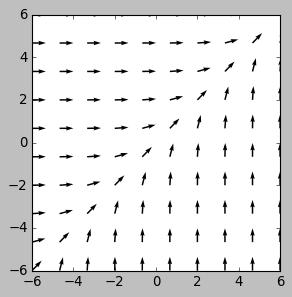

In [12]:
%matplotlib inline
plt.style.use('classic')
x = np.linspace(-6,6,10)
y = x
X, Y = np.meshgrid(x, y)
Z = np.exp(X-Y)
plt.figure(figsize=(4,4))
plt.quiver(X, Y, 1.0/np.sqrt(1+Z**2), Z/np.sqrt(1+Z**2), angles="xy")
plt.axis((-6,6,-6,6))

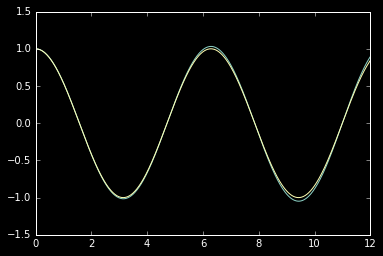

In [59]:
%matplotlib inline

h = .01

N = 1200
t = np.zeros((N))
x = np.zeros((N))
y = np.zeros((N))
x[0] = 1


for i in range(0, N-1):
    t[i+1] = t[i] + h
    x[i+1] = x[i] + h*y[i]
    y[i+1] = y[i] - h*x[i]
plt.style.use('dark_background')

plt.plot(t, x)
plt.plot(t, np.cos(t))